In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix



In [3]:
loan_data=pd.read_csv("loan data for trial tests.csv")

In [4]:
loan_data.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         36 non-null     object 
 1   loan_status     36 non-null     object 
 2   Principal       36 non-null     int64  
 3   terms           36 non-null     int64  
 4   effective_date  36 non-null     object 
 5   due_date        36 non-null     object 
 6   paid_off_time   36 non-null     object 
 7   past_due_days   8 non-null      float64
 8   age             36 non-null     int64  
 9   education       36 non-null     object 
 10  Gender          36 non-null     object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.2+ KB


In [6]:
loan_data["parsed_effective_date"] = pd.to_datetime(loan_data["effective_date"], infer_datetime_format=True)
loan_data["parsed_due_date"] = pd.to_datetime(loan_data["due_date"], infer_datetime_format=True)
loan_data["parsed_paid_off_time"] = pd.to_datetime(loan_data["paid_off_time"], infer_datetime_format=True)
print(loan_data["parsed_effective_date"].head())
print(loan_data["parsed_due_date"].head())
print(loan_data["parsed_paid_off_time"].head())

0   2016-09-08
1   2016-09-08
2   2016-09-08
3   2016-09-08
4   2016-09-09
Name: parsed_effective_date, dtype: datetime64[ns]
0   2016-10-07
1   2016-10-07
2   2016-10-07
3   2016-09-22
4   2016-10-08
Name: parsed_due_date, dtype: datetime64[ns]
0   2016-09-14 19:31:00
1   2016-10-07 09:00:00
2   2016-09-25 16:58:00
3   2016-09-22 20:00:00
4   2016-09-23 21:36:00
Name: parsed_paid_off_time, dtype: datetime64[ns]


C:\Users\User\AppData\Local\Temp\ipykernel_12188\2130553921.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  loan_data["parsed_effective_date"] = pd.to_datetime(loan_data["effective_date"], infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12188\2130553921.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  loan_data["parsed_due_date"] = pd.to_datetime(loan_data["due_date"], infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12188\2130553921.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated an

In [7]:
loan_data.tail(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,parsed_effective_date,parsed_due_date,parsed_paid_off_time
26,xqd20160027,PAIDOFF,800,15,9/10/2016,9/24/2016,9/21/2016 20:16,NaN,39,Bechalor,male,2016-09-10,2016-09-24,2016-09-21 20:16:00
27,xqd20170088,PAIDOFF,1000,15,9/10/2016,9/24/2016,9/23/2016 8:21,NaN,34,Bechalor,male,2016-09-10,2016-09-24,2016-09-23 08:21:00
28,xqd20160493,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/25/2016 17:44,14.0,27,Bechalor,male,2016-09-12,2016-10-11,2016-10-25 17:44:00
29,xqd20160494,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,9/29/2016 12:45,3.0,29,college,male,2016-09-12,2016-09-26,2016-09-29 12:45:00
30,xqd20160495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/13/2016 14:45,2.0,30,High School or Below,male,2016-09-12,2016-10-11,2016-10-13 14:45:00
31,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male,2016-09-12,2016-10-11,2016-10-14 19:08:00
32,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male,2016-09-12,2016-09-26,2016-10-10 20:02:00
33,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male,2016-09-12,2016-09-26,2016-09-29 11:49:00
34,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female,2016-09-12,2016-11-10,2016-11-11 22:40:00
35,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male,2016-09-12,2016-10-11,2016-10-19 11:58:00


In [8]:
loan_data["past_due_days"].isnull().sum()   

np.int64(28)

In [9]:
loan_data['paid_off_time'].isnull().sum()

np.int64(0)

In [10]:
day_paid_off=loan_data["parsed_paid_off_time"].dt.day
day_due=loan_data["parsed_due_date"].dt.day
pastduedays=day_paid_off - day_due
loan_data["past_due_days"].fillna(pastduedays, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12188\2222150282.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data["past_due_days"].fillna(pastduedays, inplace=True)


In [11]:
loan_data["past_due_days"].isnull().sum()

np.int64(0)

In [12]:
loan_data.tail(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,parsed_effective_date,parsed_due_date,parsed_paid_off_time
26,xqd20160027,PAIDOFF,800,15,9/10/2016,9/24/2016,9/21/2016 20:16,-3.0,39,Bechalor,male,2016-09-10,2016-09-24,2016-09-21 20:16:00
27,xqd20170088,PAIDOFF,1000,15,9/10/2016,9/24/2016,9/23/2016 8:21,-1.0,34,Bechalor,male,2016-09-10,2016-09-24,2016-09-23 08:21:00
28,xqd20160493,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/25/2016 17:44,14.0,27,Bechalor,male,2016-09-12,2016-10-11,2016-10-25 17:44:00
29,xqd20160494,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,9/29/2016 12:45,3.0,29,college,male,2016-09-12,2016-09-26,2016-09-29 12:45:00
30,xqd20160495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/13/2016 14:45,2.0,30,High School or Below,male,2016-09-12,2016-10-11,2016-10-13 14:45:00
31,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male,2016-09-12,2016-10-11,2016-10-14 19:08:00
32,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male,2016-09-12,2016-09-26,2016-10-10 20:02:00
33,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male,2016-09-12,2016-09-26,2016-09-29 11:49:00
34,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female,2016-09-12,2016-11-10,2016-11-11 22:40:00
35,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male,2016-09-12,2016-10-11,2016-10-19 11:58:00


In [13]:
loan_data.head(30)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,parsed_effective_date,parsed_due_date,parsed_paid_off_time
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,7.0,45,High School or Below,male,2016-09-08,2016-10-07,2016-09-14 19:31:00
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female,2016-09-08,2016-10-07,2016-10-07 09:00:00
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,18.0,33,Bechalor,female,2016-09-08,2016-10-07,2016-09-25 16:58:00
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male,2016-09-08,2016-09-22,2016-09-22 20:00:00
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,15.0,28,college,female,2016-09-09,2016-10-08,2016-09-23 21:36:00
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,-6.0,35,Master or Above,male,2016-09-09,2016-09-15,2016-09-09 13:45:00
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,-1.0,29,college,male,2016-09-09,2016-10-08,2016-10-07 23:07:00
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,-3.0,36,college,male,2016-09-09,2016-10-08,2016-10-05 20:33:00
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,0.0,28,college,male,2016-09-09,2016-10-08,2016-10-08 16:00:00
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,0.0,26,college,male,2016-09-10,2016-09-24,2016-09-24 13:00:00


In [14]:
negative_past_due_days=[x for x in loan_data["past_due_days"] if x < 0]
print(negative_past_due_days)

[-6.0, -1.0, -3.0, -5.0, -2.0, -3.0, -1.0, -1.0, -4.0, -1.0, -6.0, -3.0, -1.0]


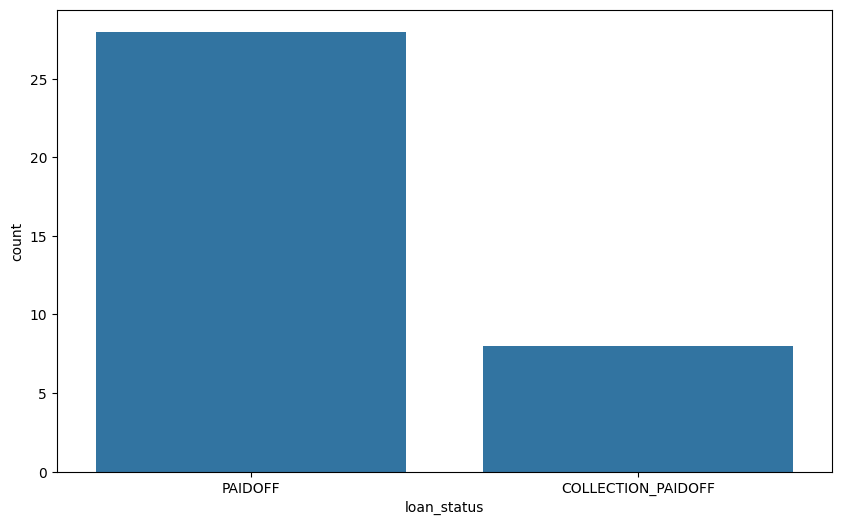

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data=loan_data)
plt.show()

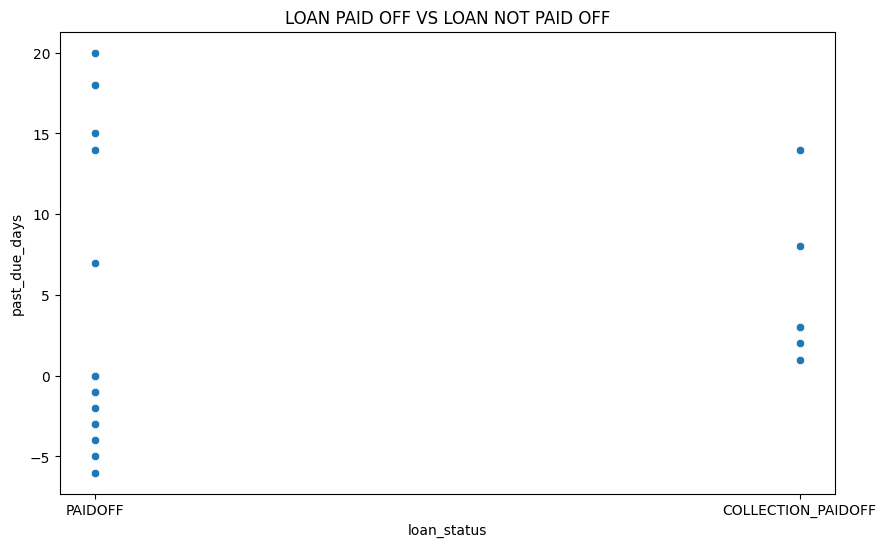

In [16]:
plt.figure(figsize=(10,6))
plt.title("LOAN PAID OFF VS LOAN NOT PAID OFF")
sns.scatterplot(x='loan_status', y='past_due_days', data=loan_data)
plt.show()


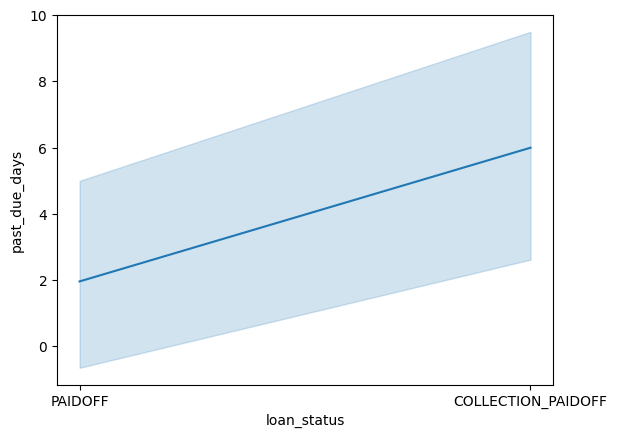

In [44]:
sns.lineplot(x='loan_status', y='past_due_days', data=loan_data)
plt.show()

<Axes: xlabel='loan_status', ylabel='past_due_days'>

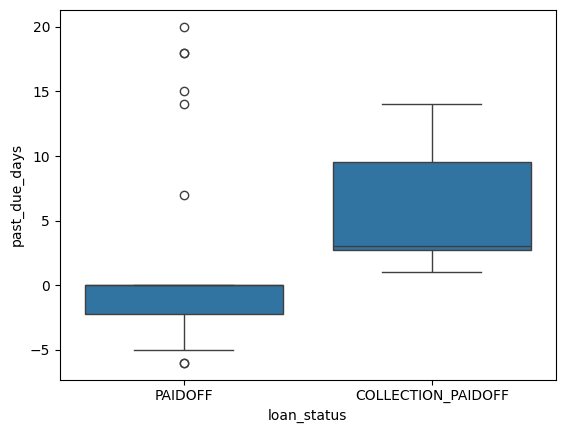

In [47]:
sns.boxplot(x='loan_status', y='past_due_days', data=loan_data)

<Axes: >

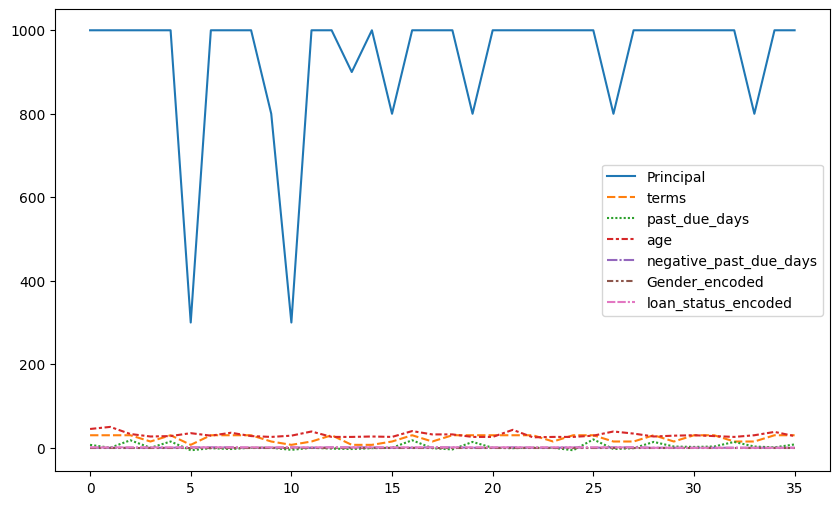

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(data=loan_data)

In [17]:
loan_data.describe()

,Principal,terms,past_due_days,age,parsed_effective_date,parsed_due_date,parsed_paid_off_time
count,36.000000,36.000000,36.000000,36.000000,36,36,36
mean,930.555556,22.861111,2.861111,31.222222,2016-09-10 02:00:00,2016-10-03 04:40:00,2016-10-01 17:50:31.666666496
min,300.000000,7.000000,-6.000000,25.000000,2016-09-08 00:00:00,2016-09-15 00:00:00,2016-09-09 13:45:00
25%,1000.000000,15.000000,-1.000000,26.000000,2016-09-09 18:00:00,2016-09-24 00:00:00,2016-09-23 16:12:00
50%,1000.000000,30.000000,0.000000,29.000000,2016-09-10 00:00:00,2016-10-08 00:00:00,2016-09-29 12:31:30
75%,1000.000000,30.000000,4.000000,34.250000,2016-09-10 00:00:00,2016-10-09 00:00:00,2016-10-08 21:06:45
max,1000.000000,30.000000,20.000000,50.000000,2016-09-12 00:00:00,2016-11-10 00:00:00,2016-11-11 22:40:00
std,170.410336,8.874209,7.290514,6.270617,NaN,NaN,NaN


In [33]:
loan_data['negative_past_due_days'] = loan_data['past_due_days'] < 0
loan_data.columns


Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'parsed_effective_date', 'parsed_due_date',
       'parsed_paid_off_time', 'negative_past_due_days'],
      dtype='object')

In [38]:
loan_data['Gender_encoded'] = loan_data["Gender"].apply(lambda x:1 if x == "Male" else 0)
loan_data['loan_status_encoded'] = loan_data["loan_status"].apply(lambda x:1 if x == "PAIDOFF" else 0)

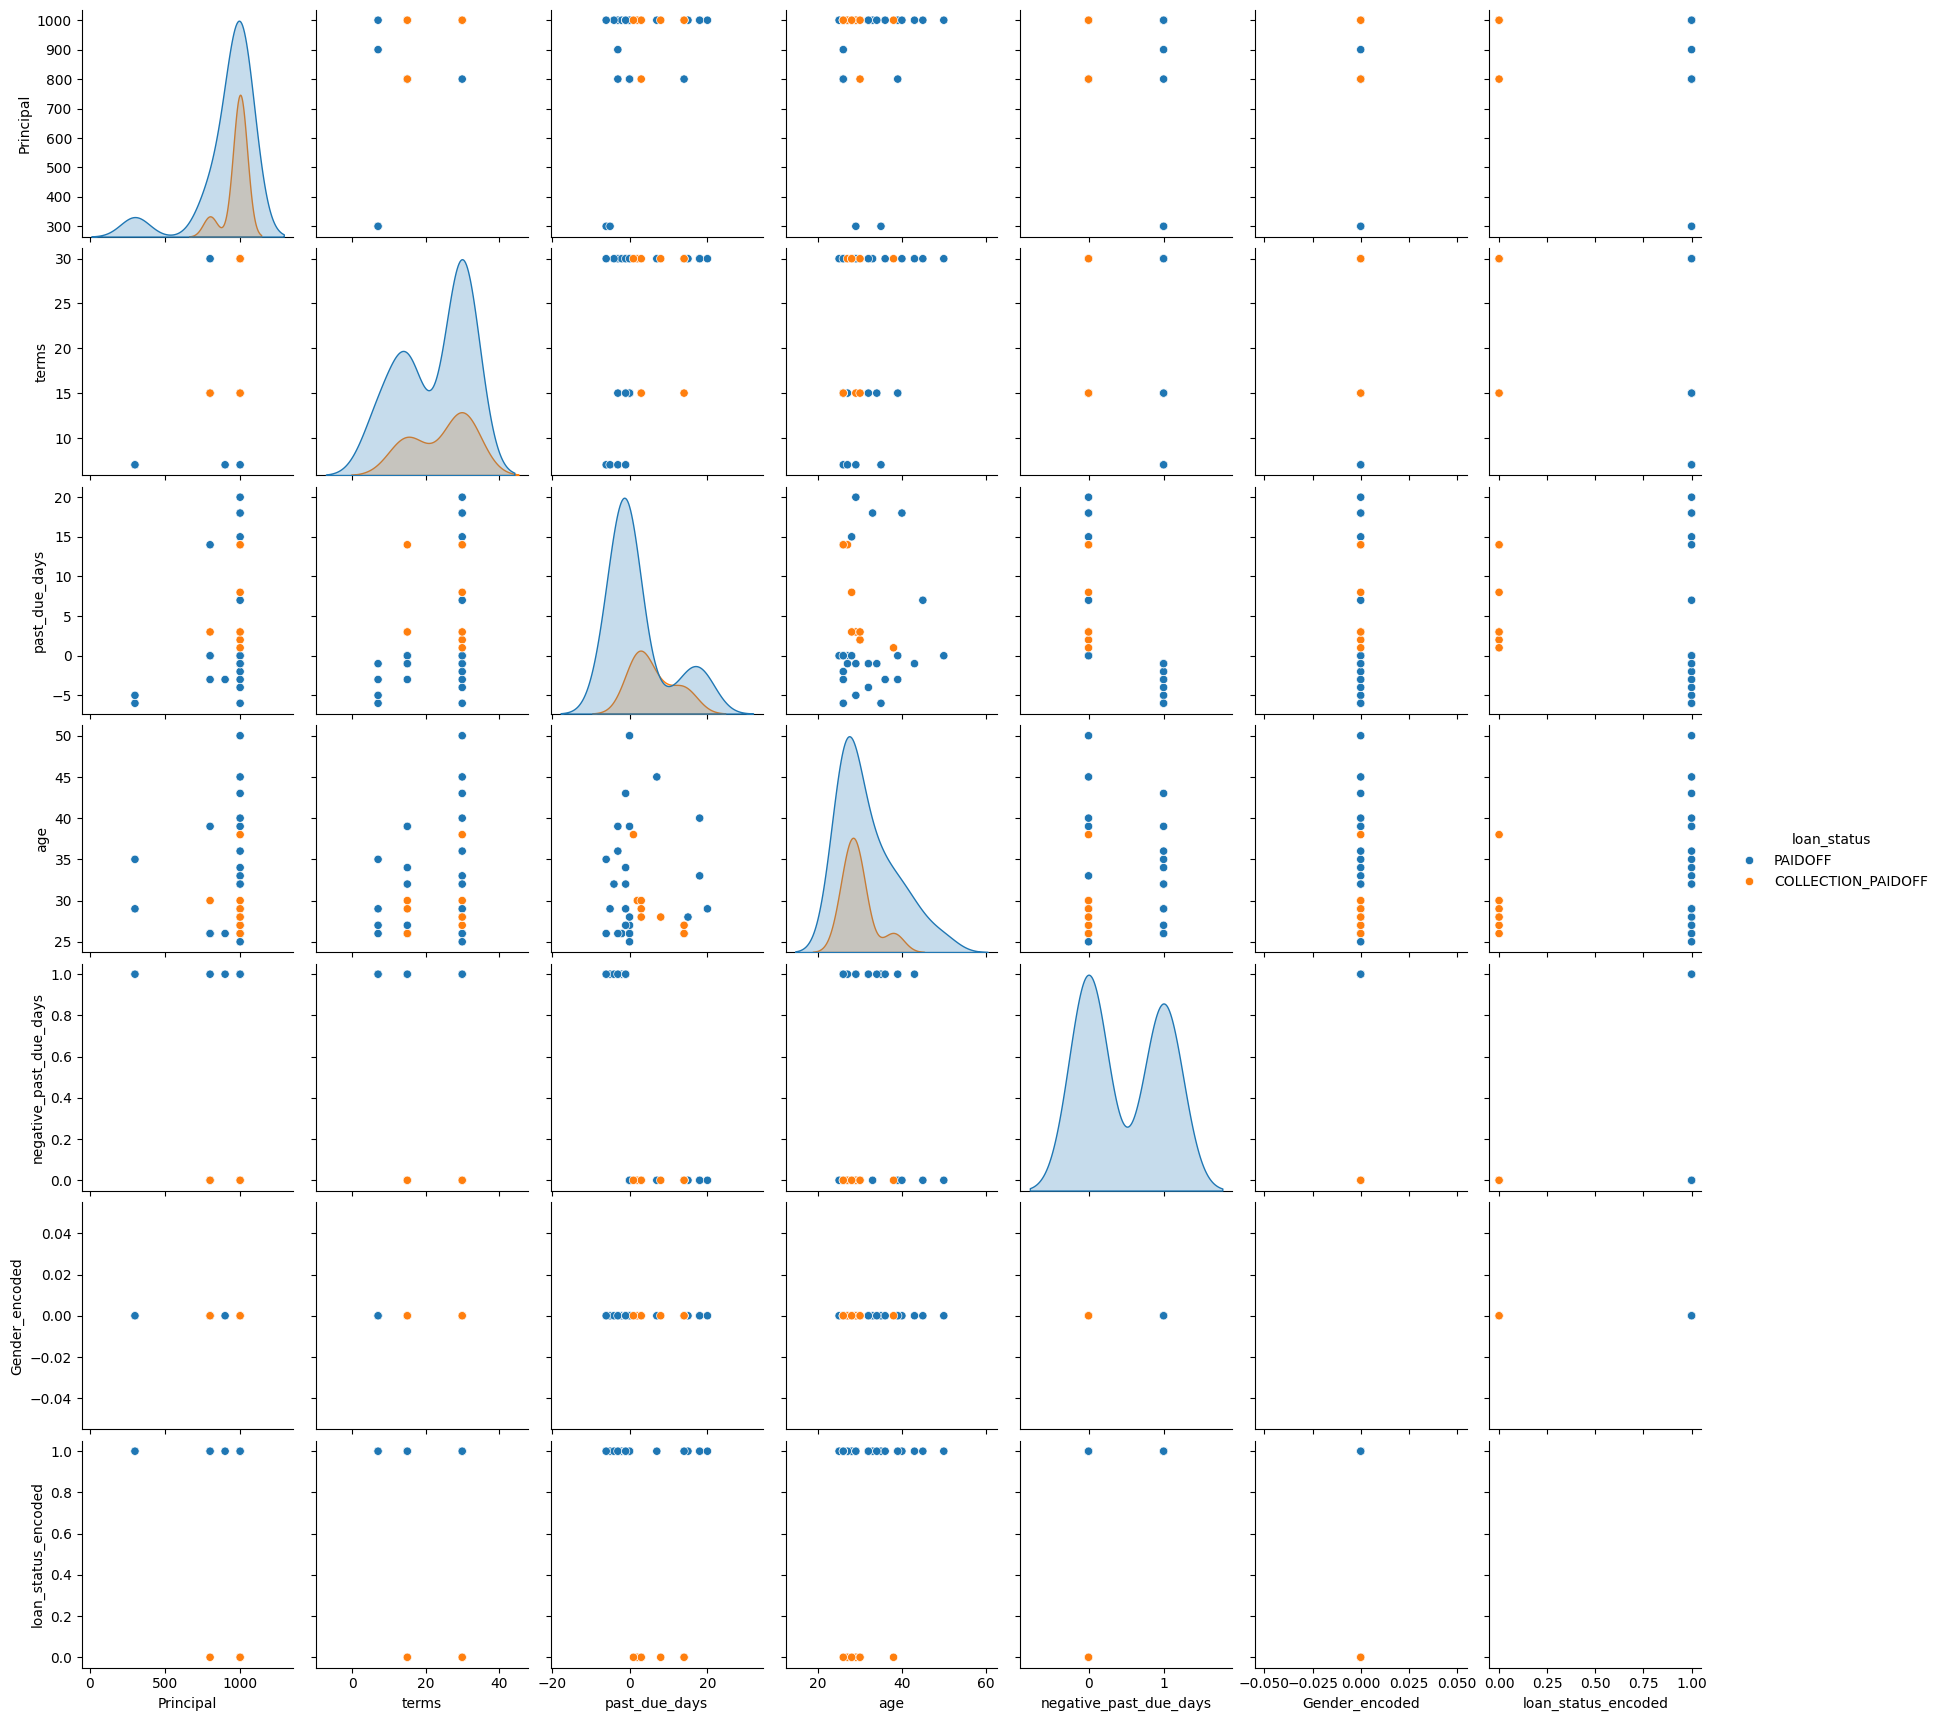

In [50]:
sns.pairplot(loan_data, hue='loan_status')